In [12]:
from qiskit import *
from qiskit.circuit.library import MCXGate, RXGate, RZZGate
from qiskit_aer import AerSimulator, StatevectorSimulator
from IPython.core.display import Latex
from qiskit.circuit import Parameter
from sympy.physics.quantum import TensorProduct
from sympy import Matrix
import numpy as np

In [2]:
def adjacency_matrix(V, edges):
    # Initialize an empty V x V matrix with all zeros
    matrix = [[0] * V for _ in range(V)]
    
    # Populate the matrix based on the edges
    for edge in edges:
        u, v = edge
        matrix[u][v] = 1
        matrix[v][u] = 1  # Undirected graph
    
    return np.array(matrix)

In [4]:
'Distance Matrix'
D = np.array([[0.        ,2 , 3],
 [2, 0.        , 5 ],
 [3, 5 , 0.        ]])

'Number of Nodes'
V = 3
edges = [(0, 1), (1, 2), (2, 0)]

'Adjacency matrix'
A = adjacency_matrix(V, edges)

'Affinity matrix'
K = TensorProduct(A, D)
print(K)

[[0. 0. 0. 0. 2. 3. 0. 2. 3.]
 [0. 0. 0. 2. 0. 5. 2. 0. 5.]
 [0. 0. 0. 3. 5. 0. 3. 5. 0.]
 [0. 2. 3. 0. 0. 0. 0. 2. 3.]
 [2. 0. 5. 0. 0. 0. 2. 0. 5.]
 [3. 5. 0. 0. 0. 0. 3. 5. 0.]
 [0. 2. 3. 0. 2. 3. 0. 0. 0.]
 [2. 0. 5. 2. 0. 5. 0. 0. 0.]
 [3. 5. 0. 3. 5. 0. 0. 0. 0.]]


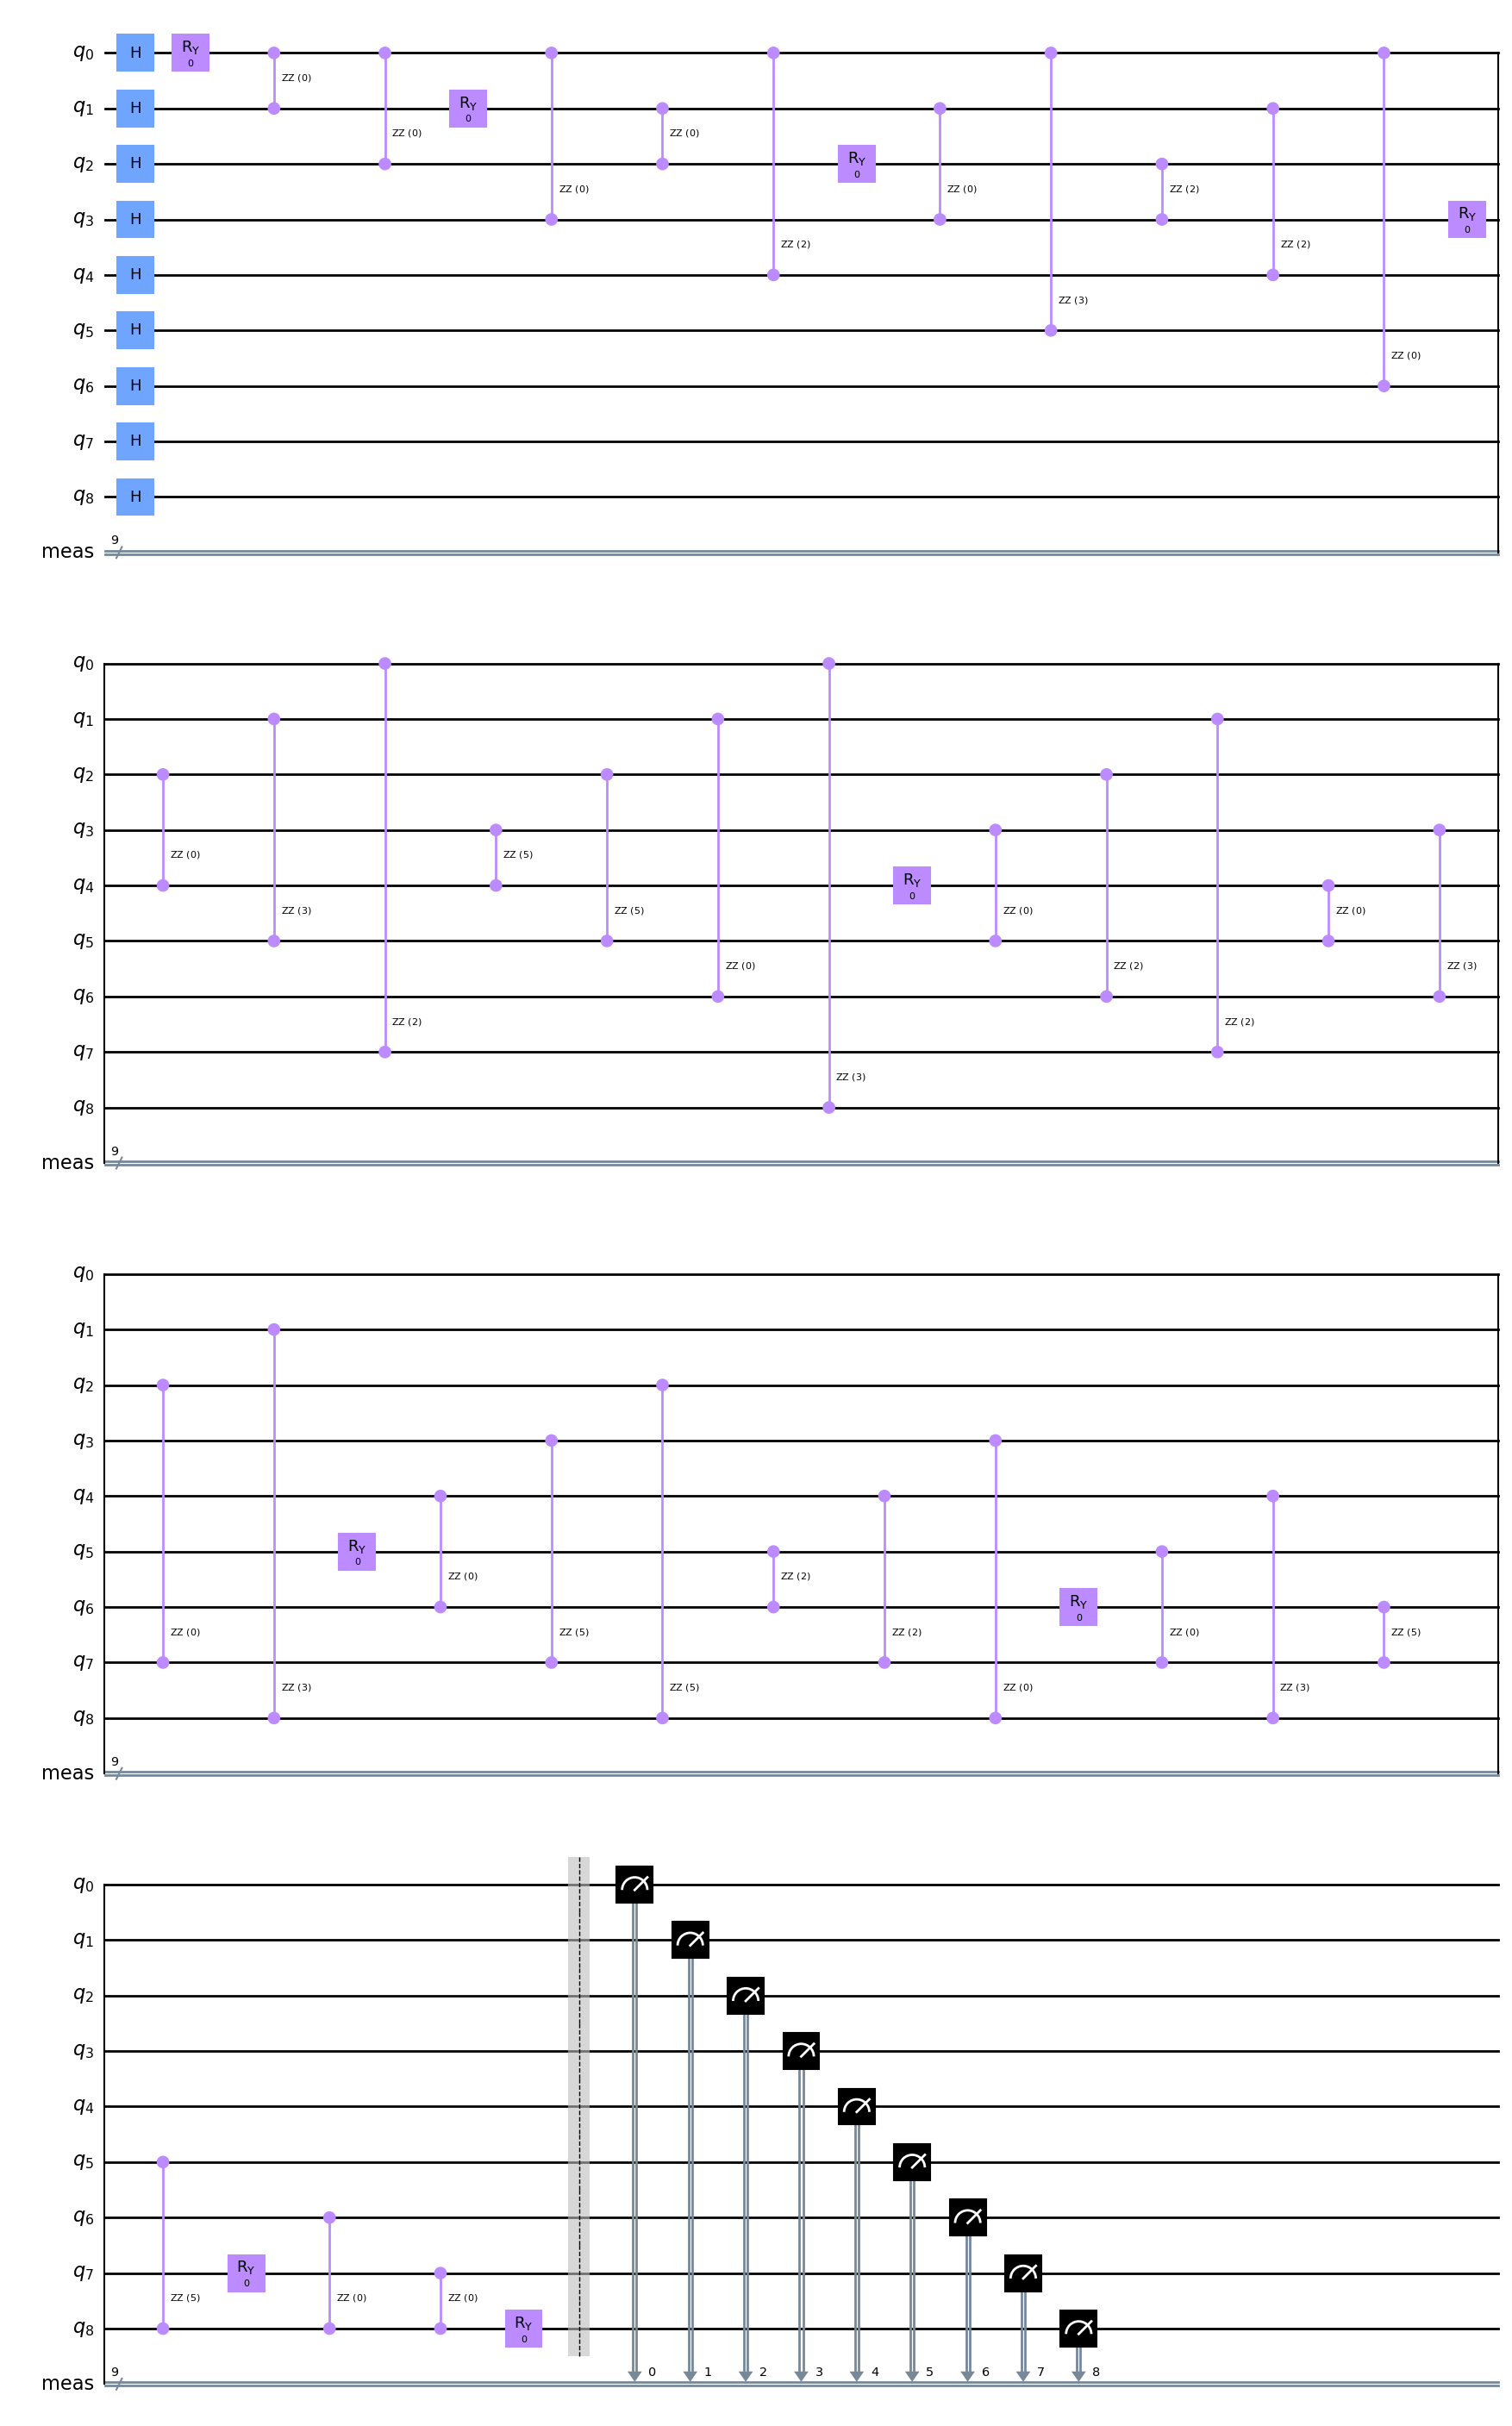

In [24]:
qc = QuantumCircuit(9)

qc.h([i for i in range(9)])

for i in range(9):
    a = 1
    for j in range(9):
        if i == j:
            qc.ry(K[i][j], i)
        elif i != j and i != a:
            qc.append(RZZGate(K[i][j]), [i, a])
            a += 1
    a += 1


qc.measure_all()
qc.draw('mpl')

In [23]:
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, simulator).result()
statevector = result.get_statevector()
statevector.draw('latex')

<IPython.core.display.Latex object>

In [6]:
!git pull origin main

Already up to date.


From https://github.com/Sajjad-Ahmad-phy/Final-Year-Project
 * branch            main       -> FETCH_HEAD


In [7]:
!git add .
!git commit -m "Your commit message"

[main 085d676] Your commit message
 7 files changed, 1034 insertions(+), 516 deletions(-)
 create mode 100644 .ipynb_checkpoints/Encoding Layer-checkpoint.ipynb
 create mode 100644 Encoding Layer.ipynb


In [8]:
!git push -u origin main

branch 'main' set up to track 'origin/main'.


To https://github.com/Sajjad-Ahmad-phy/Final-Year-Project.git
   12add71..085d676  main -> main
